In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath
import networkx as nx

from metal.label_model import LabelModel
from metal.label_model.graph_utils import JunctionTree
from synthetic.generate_spa import (
    ChainDependencies,
    TreeDependencies,
    ClusterDependencies,
    DataGenerator
)
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create the dependencies structure as a `DependenciesGraph`

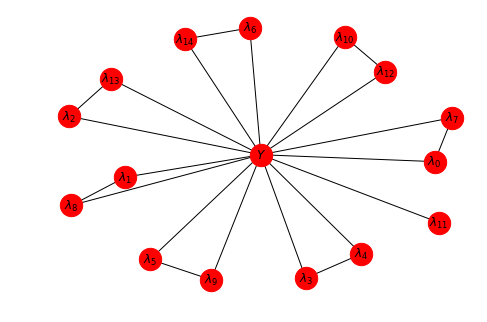

In [2]:
M = 15
N_CLUSTERS = 10
EDGE_PROB = 1.0
deps_graph = ClusterDependencies(M, N_CLUSTERS, edge_prob=EDGE_PROB)
# deps_graph = ChainDependencies(M)
deps_graph.draw()

## Creat the `DataGenerator` and label matrix $L$

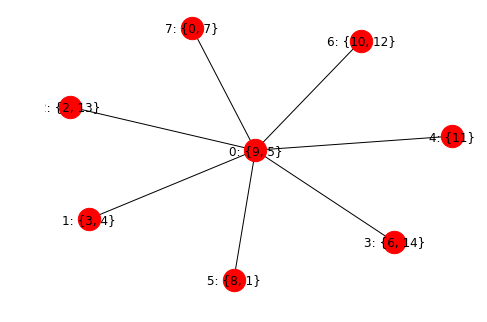

In [3]:
N = 10000
K = 2
HIGHER_ORDER_CLIQUES = True

data = DataGenerator(
    N,
    M,
    k=K,
    abstains=False,
    deps_graph=deps_graph,
    higher_order_cliques=HIGHER_ORDER_CLIQUES
)
data.jt.draw()

In [4]:
%time L, Y = data.generate_label_matrix(N)

CPU times: user 5.21 s, sys: 38 ms, total: 5.25 s
Wall time: 5.24 s


### Train `LabelModel`

In [5]:
class_balance = data.get_class_balance()
class_balance

array([0.30334013, 0.69665987])

In [6]:
lm = LabelModel(k=2)

lm.train(
    L_train=L,
    class_balance=class_balance,
    junction_tree=data.jt,
    lr=0.001,
    n_epochs=10000,
    print_every=1000
)

Estimating Z...
[E:0]	Train Loss: 550.34069824
[E:1000]	Train Loss: 4.09521866
[E:2000]	Train Loss: 4.09521866
[E:3000]	Train Loss: 4.09521866
[E:4000]	Train Loss: 4.09521866
[E:5000]	Train Loss: 4.09521866
[E:6000]	Train Loss: 4.09521866
[E:7000]	Train Loss: 4.09521866
[E:8000]	Train Loss: 4.09521866
[E:9000]	Train Loss: 4.09521866
[E:9999]	Train Loss: 4.09521866
Finished Training


In [7]:
mu_est = lm.mu
mu = data.get_mu()
np.hstack([mu_est, mu])

array([[0.4939074 , 0.49972877],
       [0.48013624, 0.47927717],
       [0.39733056, 0.40170591],
       [0.47902333, 0.47408538],
       [0.31824034, 0.31753451],
       [0.46638971, 0.47308255],
       [0.53260387, 0.53439356],
       [0.30686781, 0.31999586],
       [0.42769638, 0.42788977],
       [0.50297149, 0.50743962],
       [0.50666778, 0.50432902],
       [0.51965582, 0.51774196],
       [0.56490913, 0.56753999],
       [0.38091506, 0.37298468],
       [0.56036541, 0.55889649],
       [0.33651847, 0.34458829],
       [0.21851146, 0.21608604],
       [0.21304749, 0.2150693 ],
       [0.42678791, 0.42871809],
       [0.2948008 , 0.29437291],
       [0.41028555, 0.410856  ],
       [0.21461757, 0.22953976]])

In [8]:
np.mean(np.abs(mu - mu_est))

0.004073737282724915

In [16]:
lm.score(X=L, Y=Y)

Accuracy: 0.750


0.7501